In [64]:
from bigraph_viz import plot_bigraph, plot_multitimestep, plot_flow
from bigraph_viz.dict_utils import replace_regex_recursive, pp

save_images = False
plot_settings = {
    'remove_process_place_edges': True, 
    'size':'8,5', 
    'show_types': True, 
    'label_margin': '0.01'
}
save_images_settings = {
    'out_dir': 'out/vivarium_basics',
    'dpi': '250'
}
if save_images:
    plot_settings.update(save_images_settings)

colors = {
    'DNA': 'forestgreen',
    'RNA': 'darkorange',
    'protein': 'mediumpurple'
}

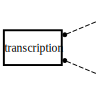

In [46]:
pr = {
    'transcription': {
        '_ports': {
            'DNA': '',
            'mRNA': '',
        }
    }
}
plot_settings1 = {
    'rankdir':'RL', 
    'filename': 'process',
    'port_labels': False,
    **plot_settings
}
plot_bigraph(pr, **plot_settings1)

In [47]:
tx = {
    'transcription': {
        'wires': {
            'DNA': 'DNA<br/>(concentrations)',
            'mRNA': 'mRNA<br/>(concentrations)',
        }
    }
}

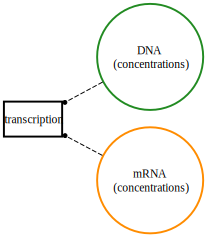

In [48]:
plot_settings2 = {
    'rankdir':'RL', 
    'filename': 'tx',
    'port_labels': False,
    'node_border_colors': {
        ('DNA<br/>(concentrations)',): colors['DNA'],
        ('mRNA<br/>(concentrations)',): colors['RNA'],
    },
    **plot_settings
}
plot_bigraph(tx, **plot_settings2)

In [49]:
txtl = {
    'transcription': {
        'wires': {
            'DNA': 'DNA<br/>(concentrations)',
            'mRNA': 'mRNA<br/>(concentrations)',
        }
    },
    'translation': {
        'wires': {
            'mRNA': 'mRNA<br/>(concentrations)',
            'protein': 'protein<br/>(concentrations)',
        }
    },
}

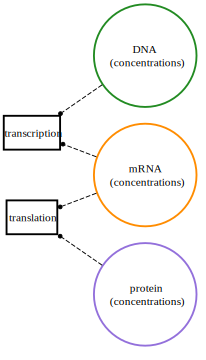

In [50]:
plot_settings3 = {
    'rankdir':'RL', 
    'filename': 'txtl',
    'port_labels': False,
    'node_border_colors': {
        ('DNA<br/>(concentrations)',): colors['DNA'],
        ('mRNA<br/>(concentrations)',): colors['RNA'],
        ('protein<br/>(concentrations)',): colors['protein'],
    },
    **plot_settings
}
plot_bigraph(txtl, **plot_settings3)

In [51]:
txtlstoch = {
    'stochastic<br/>transcription': {
        'wires': {
            'DNA': 'DNA<br/>(counts)',
            'mRNA': 'mRNA<br/>(counts)',
        }
    },
    'counts-concentrations<br/>adapter': {
        'wires': {
            'counts': 'mRNA<br/>(counts)',
            'concentrations': 'mRNA<br/>(concentrations)',
        }
    },
    'translation': {
        'wires': {
            'mRNA': 'mRNA<br/>(concentrations)',
            'protein': 'protein<br/>(concentrations)',
        }
    },
}

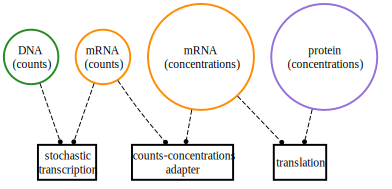

In [52]:
plot_settings4 = {
    'rankdir':'TB', 
    'filename': 'txtlstoch',
    'port_labels': False,
    'node_border_colors': {
        ('DNA<br/>(counts)',): colors['DNA'],
        ('mRNA<br/>(counts)',): colors['RNA'],
        ('mRNA<br/>(concentrations)',): colors['RNA'],
        ('protein<br/>(concentrations)',): colors['protein'],
    },
    **plot_settings
}
plot_bigraph(txtlstoch, **plot_settings4)

In [53]:
agent = {
    'DNA<br/>(counts)': '', 
    'mRNA<br/>(counts)': '', 
    'mRNA<br/>(concentrations)': '', 
    'protein<br/>(concentrations)': '', 
    'boundary': '',
    'division': {
        'wires': {
            'boundary': 'boundary',
            'agents': ('..',)
        }
    },
    **txtlstoch
}

txtlhierarchy = {
    'agents': {
        '0': agent
    },
    'fields': '',
    'dimensions': '',
    'multibody': {
        'wires': {
            'agents': 'agents',
        }
    },
    'diffusion': {
        'wires': {
            'fields': 'fields',
            'agents': 'agents',
            'dimensions': 'dimensions',
        }
    },
}

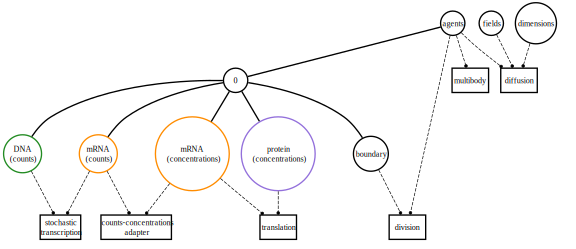

In [54]:
plot_settings5 = {
    'rankdir':'TB', 
    'filename': 'txtlhierarchy',
    'port_labels': False,
    'node_border_colors': {
        ('agents', '0', 'DNA<br/>(counts)',): colors['DNA'],
        ('agents', '0', 'mRNA<br/>(counts)',): colors['RNA'],
        ('agents', '0', 'mRNA<br/>(concentrations)',): colors['RNA'],
        ('agents', '0', 'protein<br/>(concentrations)',): colors['protein'],
    },
    **plot_settings
}

plot_bigraph(txtlhierarchy, **plot_settings5)

In [55]:
txtldivide = {
    'agents': {
        '1': agent,
        '2': agent
    },
    'fields': '',
    'dimensions': '',
    'multibody': {
        'wires': {
            'agents': 'agents',
        }
    },
    'diffusion': {
        'wires': {
            'fields': 'fields',
            'agents': 'agents',
            'dimensions': 'dimensions',
        }
    },
}

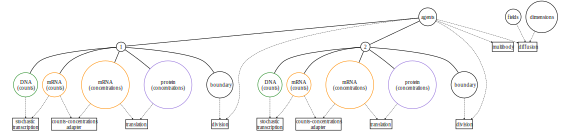

In [56]:
plot_settings6 = {
    'rankdir':'TB', 
    'filename': 'txtldivide',
    'port_labels': False,
    'node_border_colors': {
        ('agents', '1', 'DNA<br/>(counts)',): colors['DNA'],
        ('agents', '1', 'mRNA<br/>(counts)',): colors['RNA'],
        ('agents', '1', 'mRNA<br/>(concentrations)',): colors['RNA'],
        ('agents', '1', 'protein<br/>(concentrations)',): colors['protein'],
        ('agents', '2', 'DNA<br/>(counts)',): colors['DNA'],
        ('agents', '2', 'mRNA<br/>(counts)',): colors['RNA'],
        ('agents', '2', 'mRNA<br/>(concentrations)',): colors['RNA'],
        ('agents', '2', 'protein<br/>(concentrations)',): colors['protein'],
    },
    **plot_settings
}
plot_bigraph(txtldivide, **plot_settings6, node_label_size='20')

In [60]:
agent_path = ['agents', '0']
multiparadigmagent = {
    'reactions': '',
    'internal counts': '',
    'cobra external': '',
    'flux bounds': '',
    'species': '',
    'rates': '',
    'delta species': '',
    'boundary': {
        'location': '',
        'mass': '',
        'external': '',
        # 'divide': '',
    },
    'cobra': {
        'wires': {
            '1': 'reactions',
            '2': 'internal counts',
            '3': 'cobra external',
            '4': 'flux bounds'}},
    'mass deriver': {
        'wires': {
            '1': 'boundary'}},
    'volume deriver': {
        'wires': {
            '1': 'boundary'}},
    'flux adapter': {
        'wires': {
            '1': 'flux bounds'}},
    'bioscrape': {
        'wires': {
            '1': 'species',
            '2': 'rates'}},
    'delta counts to concs': {
        'wires': {
            '1': 'delta species',
            '2': 'boundary'}},
    'biomass adapter': {
        'wires': {
            '1': 'boundary'}},
    'division': {
        'wires': {
            '1': ['..', '..', 'agents'],
            '2': ['boundary', 'mass']}},
    # 'divide condition': {
    #     'wires': {
    #         '1': ['boundary', 'divide'],
    #         '2': ['boundary', 'mass']}},
    'local field': {
        'wires': {
            '1': ['..', '..', 'dimensions'],
            '2': ['..', '..', 'fields'],
            '3': ['boundary', 'location'],
            '4': 'species',}},
    'field counts deriver': {
        'wires': {
            '1': ['boundary', 'external'],
            '2': ['boundary', 'location'],
            '3': 'species',}},
}

multiparadigmenv = {
    'agents': {
        '0': multiparadigmagent},
    'fields': '',
    'dimensions': '',
    'multibody': {
        'wires': {
            'agents': 'agents'}},
    'diffusion': {
        'wires': {
            'fields': 'fields',
            'agents': 'agents',
            'dimensions': 'dimensions'}}}

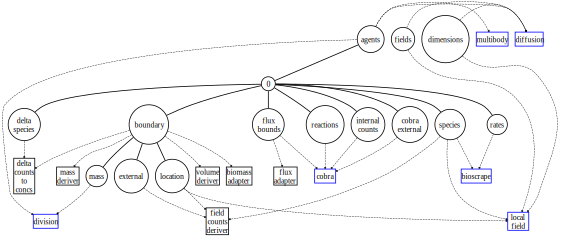

In [65]:
plot_settings7 = {
    'rankdir':'TB', 
    'filename': 'multiparadigm',
    'port_labels': False,
    'node_border_colors': {
        ('agents', '0', 'cobra',): 'blue',
        ('agents', '0', 'bioscrape',): 'blue',
        ('agents', '0', 'division',): 'blue',
        ('agents', '0', 'local<br/>field',): 'blue',
        ('multibody',): 'blue',
        ('diffusion',): 'blue',
    },
    'node_groups': [
        [('agents',), ('fields',), ('dimensions',), ('multibody',), ('diffusion',)]
    ],
    **plot_settings
}
multiparadigmenv = replace_regex_recursive(multiparadigmenv)
plot_bigraph(multiparadigmenv, **plot_settings7, node_label_size='20')